
# Linear Regression - Project Exercise

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

#I need the above lines thanks to my Jupyter Notebook theme (Seaborn's black text is very hard to read on the dark blue background)

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [4]:
customers = pd.read_csv("Ecommerce Customers")

**Checking the head, info, and describe of the customers dataframe**

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Below, I explore the data using Seaborn**


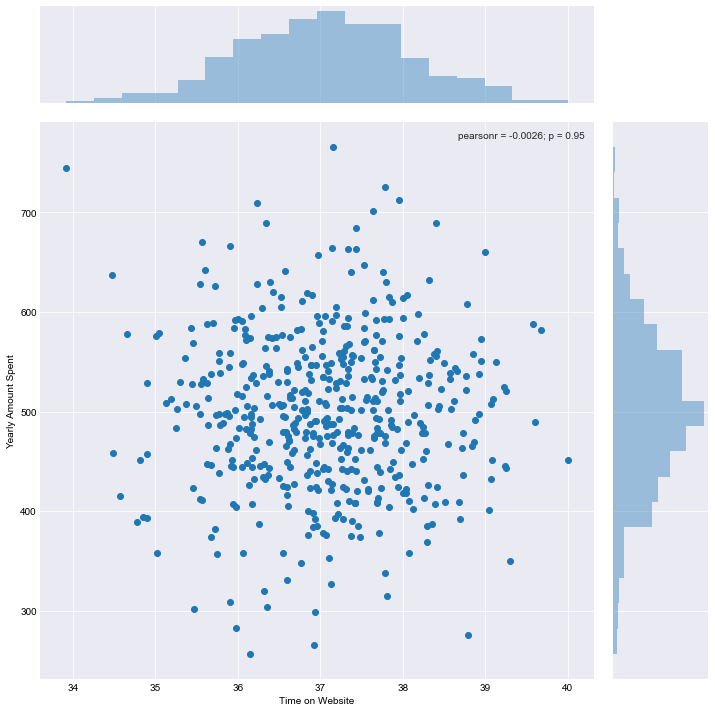

In [8]:
jointplot_web = sns.jointplot(x="Time on Website", y="Yearly Amount Spent",data=customers, size=10)

In [9]:
{k: v for k, v in sns.axes_style().items() if "color" in k}

{'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'text.color': '.15',
 'xtick.color': 'black',
 'ytick.color': 'black'}

** Same as above, but with Time on App column instead. **

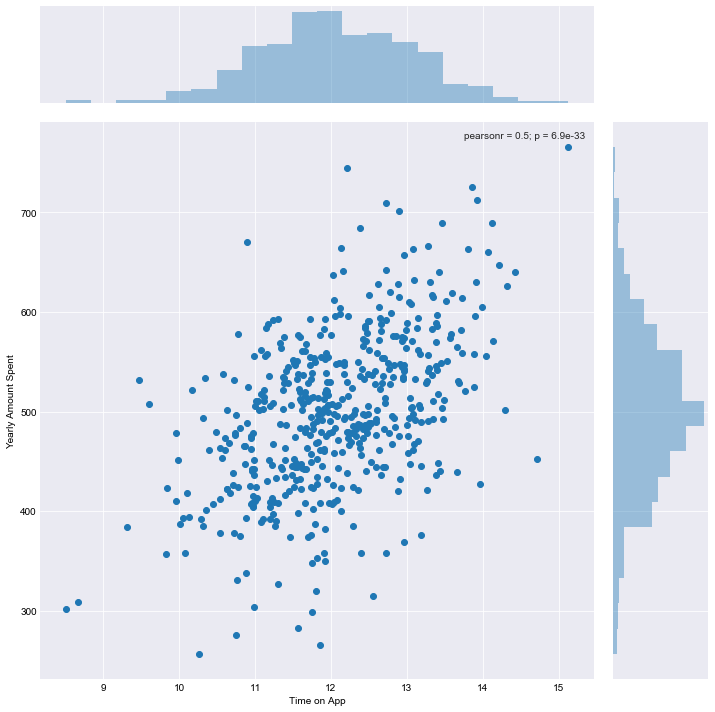

In [10]:
jointplot_app = sns.jointplot(x="Time on App", y="Yearly Amount Spent",data=customers, size=10)

**2D hex bin plot comparing Time on App and Length of Membership using jointplot**

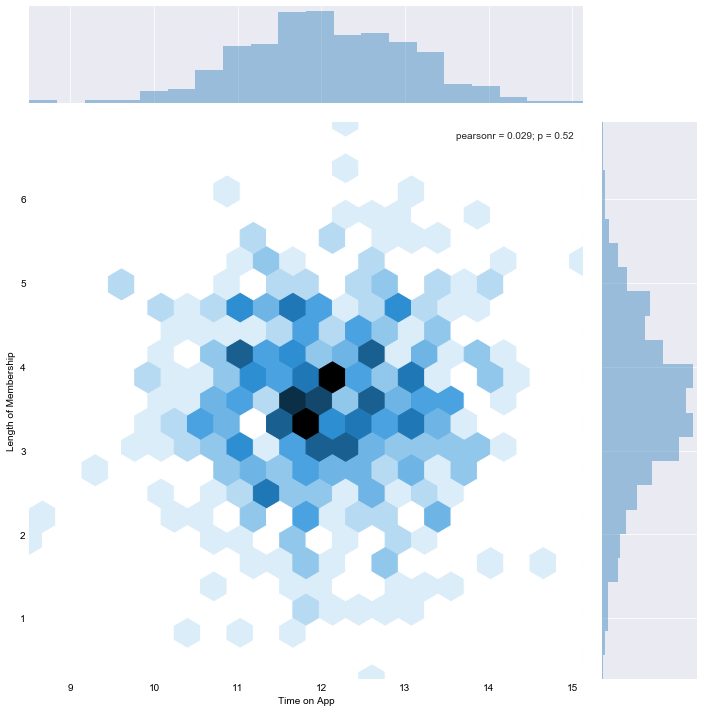

In [11]:
jointplot_hex = sns.jointplot(x="Time on App", y="Length of Membership", data=customers, size=10, kind="hex")

**Here, I explore these types of relationships across the entire data set using pairplot**

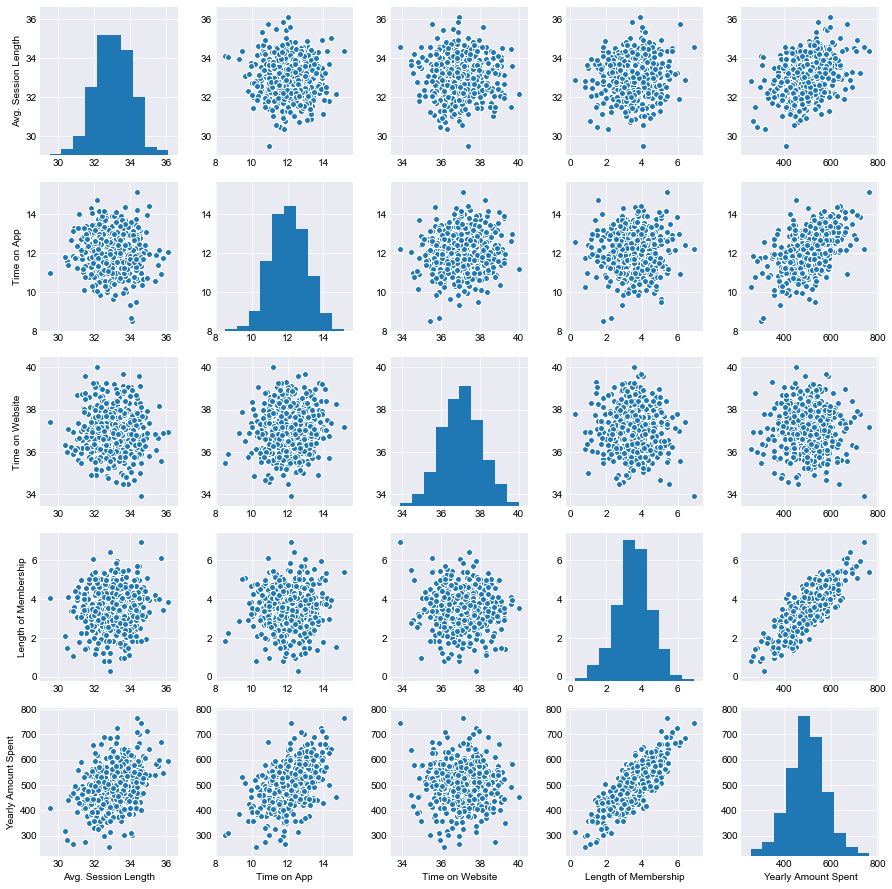

In [12]:
sns.pairplot(data=customers)

**Based off this plot, Length of Membership appears to be the most correlated feature with Yearly Amount Spent **

**Here's a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership **

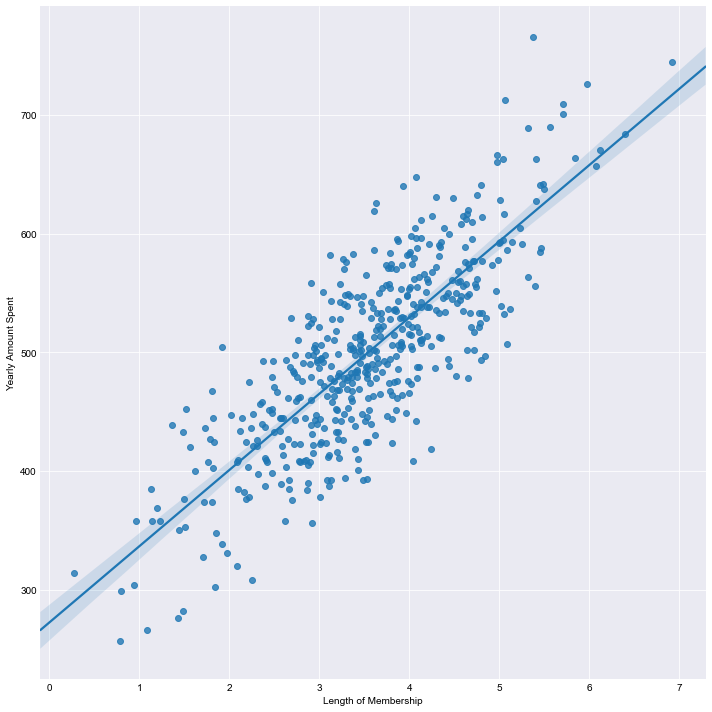

In [13]:
sns.lmplot(x="Length of Membership", y = "Yearly Amount Spent", data=customers, size=10)

## Training and Testing Data

** Here, I split the data into a testing set and a training set using train_test_split from scikit learn. **

In [14]:
from sklearn.cross_validation import train_test_split

C:\Users\thela\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
X = customers[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers["Yearly Amount Spent"]

In [17]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
5,33.871038,12.026925,34.476878,5.493507
6,32.021596,11.366348,36.683776,4.685017
7,32.739143,12.351959,37.373359,4.434273
8,33.987773,13.386235,37.534497,3.273434
9,31.936549,11.814128,37.145168,3.202806


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training the Model

** Here, the model is trained using the training data **

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Below are the coefficients of the model**

In [22]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [23]:
pd.DataFrame(lm.coef_,X_train.columns,columns=["Coeff"])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data

** Time to evaluate the performance of the model using the test values**

In [24]:
predictions = lm.predict(X_test)

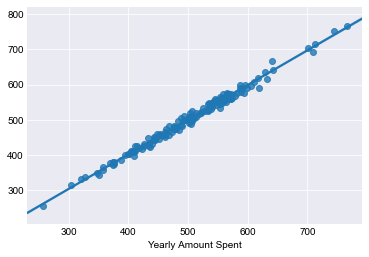

In [25]:
sns.regplot(x=y_test,y=predictions)

## Evaluating the Model

** Below I calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error **

In [26]:
from sklearn import metrics

In [27]:
mae = metrics.mean_absolute_error(y_test,predictions)
print('MAE: ' + str(mae))
mse = metrics.mean_squared_error(y_test,predictions)
print('MSE: ' + str(mse))
rmse = np.sqrt(mse)
print('RSME: ' + str(rmse))

MAE: 7.22814865343
MSE: 79.813051651
RSME: 8.93381506698



## Residuals

** Below is a histogram of the residuals which looks normally distributed **

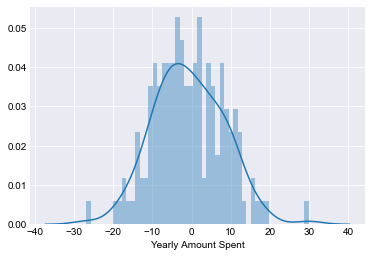

In [28]:
sns.distplot((y_test - predictions), bins = 50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [29]:
pd.DataFrame(lm.coef_, X.columns, columns= ["Coeffecient"])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** So what do these coefficients mean? **

*If we used Avg. Session Length, for example, essentially, the coefficient tells us the predicted dollar change if every other feature was held constant. A 1 unit change in the Avg. Session Length results in around 26 dollars of spend.*

**Should the company should focus more on their mobile app or on their website? **


*This really depends on some other factors, such as cost and resources available to address either solution. One way to look at this data is to say, "Okay, Time on App seems to have a much higher spend rate than the website, so we should focus on increasing it's effectiveness. Another way to interpret this data is to say, "Well, the Time on Website produces almost nothing. Maybe we should dedicate resources to bringing the website closer to the App's effectiveness. This answer would need input from Business decision leaders to decided on the appropiate path.*